<a href="https://colab.research.google.com/github/Toadoum/Spark-Foundation-Internship-in-Data-Science-BA-GRIP-/blob/main/GRIP_Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **SAKAYO TOADOUM SARI**

### *Data Science & Business Analytics Intern at Spark Foundation*



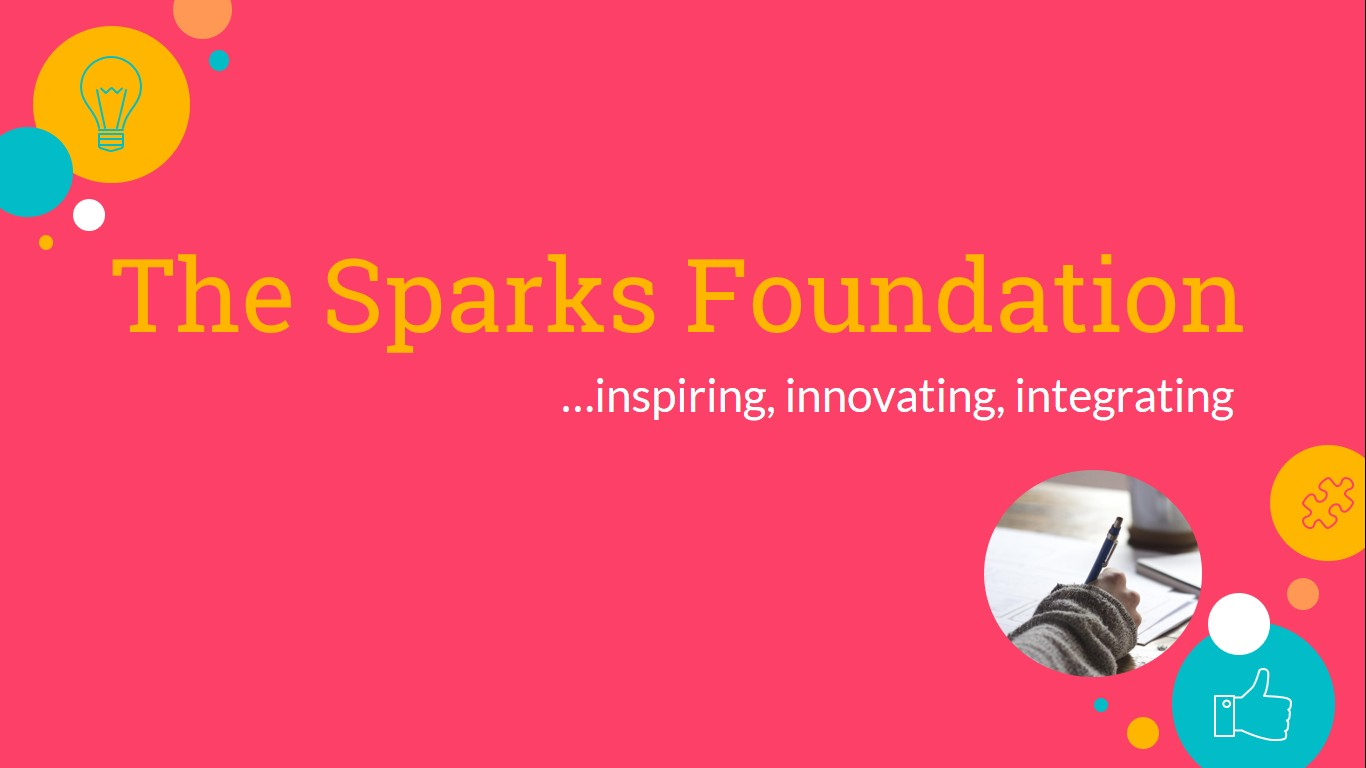

In [49]:
from IPython.display import Image
Image(filename='/content/sparkf.jpeg')

## **TASK2**

### Prediction using Decision Tree

### **Aim of the project: Create decision tree and visualize graphically. The model should be able to predict the right class based on new data**

### Level: Intermediate

In [ ]:
!pip install pydotplus
!apt-get install graphviz -y

In [ ]:
!pip install --upgrade scikit-learn==0.20.3

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pickle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score

# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
%matplotlib inline

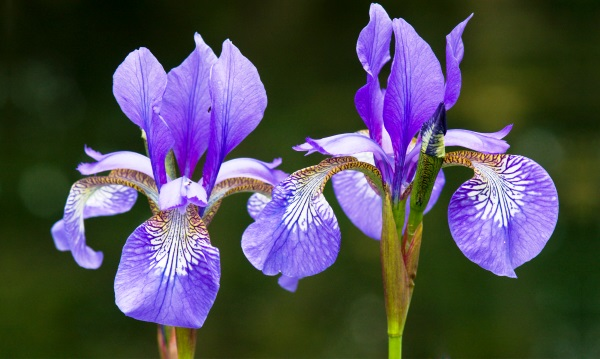

In [16]:
from IPython.display import Image
Image(filename='/content/Iris.jpeg', height=400, width=500)

In [7]:
Data = pd.read_csv("/content/Iris.csv")
Data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
Data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### The data doesn't contain missing values

In [10]:
Data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
Data.drop('Id', axis = 1 , inplace= True)

## **Exploratory Data Analysis**

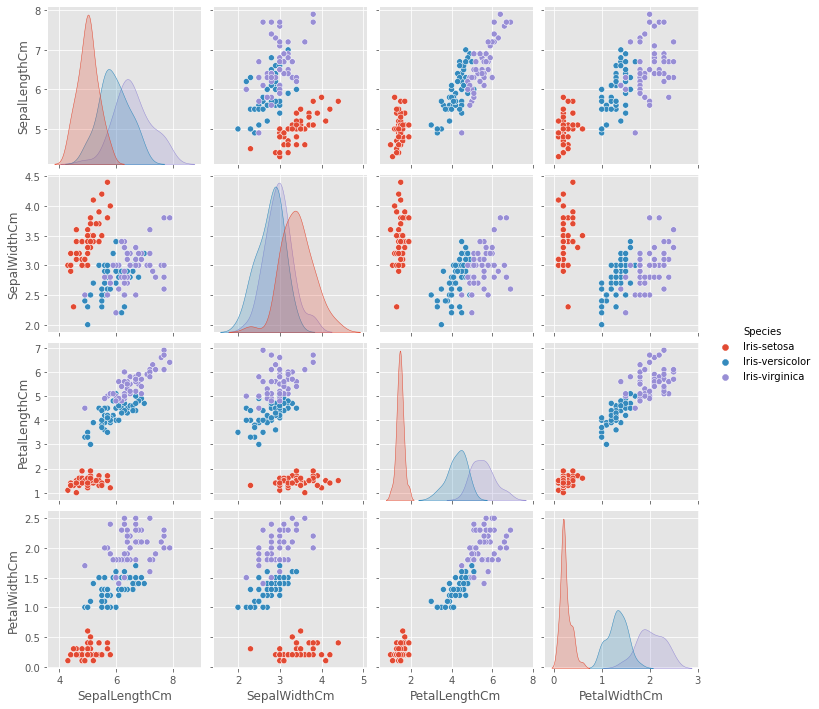

In [20]:
plt.style.use('ggplot')
sns.pairplot(Data, hue = 'Species')
plt.show()

#### We can easily observe that "iris-setosa" is separate from others target (distinctive cluster) in every parameter, while the other two species are overlapping a bit on each other

### **Let's check the correlation**

[]

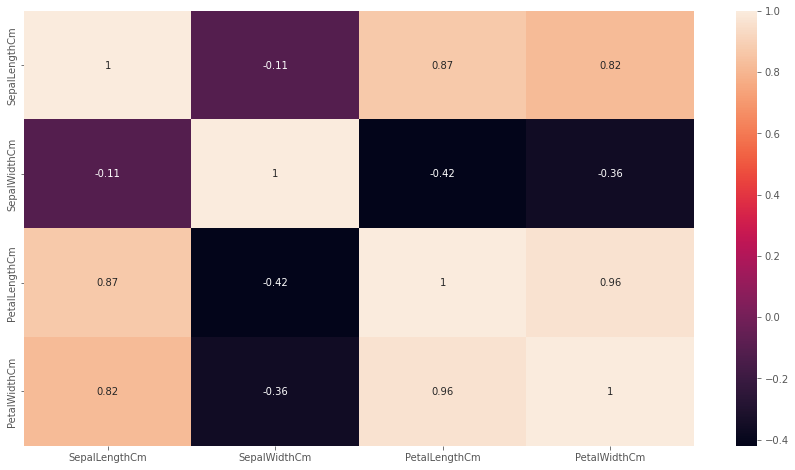

In [24]:
plt.figure(figsize=(15,8))
sns.heatmap(Data.corr(),annot=True)
plt.plot()

#### Petal length is highly correlated with petal width.Sepal lenth is not related sepal width

## **We check distribution of categorical feature “Species” with all other four input variables**

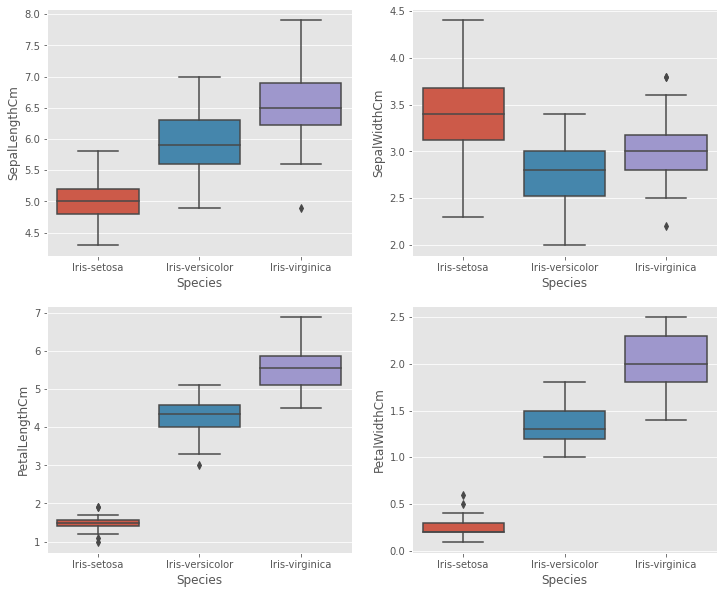

In [26]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x="Species",y="SepalLengthCm",data=Data)
plt.subplot(2,2,2)
sns.boxplot(x="Species",y="SepalWidthCm",data=Data)
plt.subplot(2,2,3)
sns.boxplot(x="Species",y="PetalLengthCm",data=Data)
plt.subplot(2,2,4)
sns.boxplot(x="Species",y="PetalWidthCm",data=Data)

## **Data preparation for modelling**

In [41]:
train,test=train_test_split(Data,test_size=0.2,random_state=100)

In [42]:
X_train=train[['SepalLengthCm',"SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
y_train=train.Species

In [43]:
X_test=test[['SepalLengthCm',"SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
y_test=test.Species

## **Modelling Decision Tree using Sklearn** 

In [44]:
dtc = DecisionTreeClassifier(criterion = "entropy",random_state =0)
model = dtc.fit(X_train,y_train)
y_predict = dtc.predict(X_test)

## **We save our model for visualization**

In [45]:
pickle.dump(dtc, open('model.pkl','wb'))

## **Visualization of Decision Tree Classifier algorithm graph**

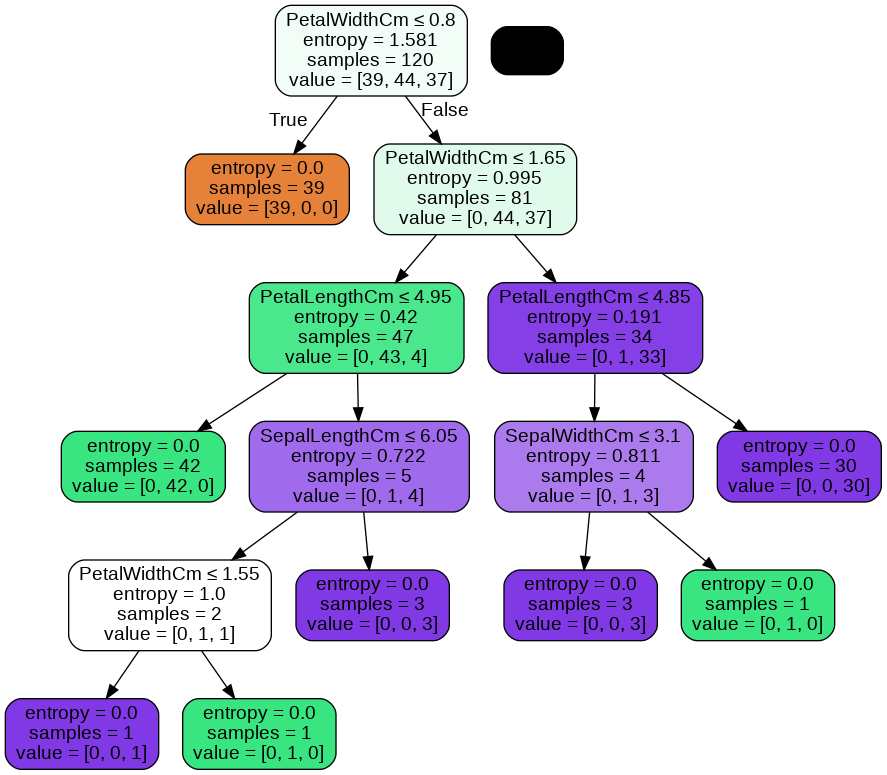

In [46]:
# Visualize the graph
dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data, feature_names= Data.columns.drop('Species'),  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## **Model Evaluation**

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.83      0.91         6
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30



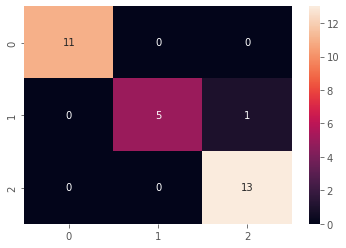

In [47]:
print(classification_report(y_test, y_predict))
sns.heatmap(confusion_matrix(y_test, y_predict),annot = True)

In [48]:
accuracy_score(y_test, y_predict)

0.9666666666666667

#### Overall our model is performing well because we an accuracy of almost 97%